In [15]:
from arcgis.gis import GIS
from arcgis.features import GeoAccessor
from arcgis.map import Map, renderers, symbols

In [16]:
gis = GIS("Home")

# Drawing Info and Renderer properties

Howdy folks. I know it's Friday and you've probably seen a bunch of stuff about admin workflows or cold, hard, data this week, so consider this your break to look at some pretty colors before diving back into that. We're going to look at one of the most fun parts of Web Maps: how we can manipulate the drawing info of Web Map layers, and all of the different options we have for coloring our maps and changing the symbology. 

As some of you might know, JavaScript does a lot of the heavy lifting for these maps, and the data for a map's layers is all stored in JSON dictionaries. In order to edit a map in the Python API, we have to change and add to these dictionaries, or leverage the JavaScript API itself to make these dictionaries for us.

There are a couple ways our API approaches this- we have methods that take advantage of these JSAPI methods, and we also have methods that manually construct these dictionaries and add them into the map so they get rendered. If you're really comfortable with the structure, you can put together these dictionaries yourself and add them to the map data. We'll briefly preview all of these methods, but you can read more up on them below.
  
https://developers.arcgis.com/python/guide/advanced-cartography-part1/

We're going to start by just examining what the `drawingInfo` part of a layer's dictionary looks like- this will give us insight into what we're changing. We'll begin with looking at how we can change the color of the good ol' USA, before showing some of the more advanced coloring options we have.

<Item title:"USA Census States" type:Feature Layer Collection owner:esri_dm>
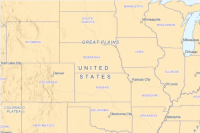

In [17]:
us_states_item = gis.content.get('774019f31f8549c39b5c72f149bbe74e')
us_states_item

In [18]:
us_states_layer = us_states_item.layers[0]
us_states_layer.properties

{
  "currentVersion": 11.2,
  "id": 0,
  "name": "dtl_st",
  "type": "Feature Layer",
  "serviceItemId": "774019f31f8549c39b5c72f149bbe74e",
  "cacheMaxAge": 30,
  "displayField": "STATE_NAME",
  "description": "&lt;div style=\"font-family:&amp;quot;Avenir Next W01&amp;quot;, &amp;quot;Avenir Next W00&amp;quot;, &amp;quot;Avenir Next&amp;quot;, Avenir, &amp;quot;Helvetica Neue&amp;quot;, sans-serif; font-size:16px;\"&gt;&lt;span style=\"font-family:inherit;\"&gt;This layer presents the 2020 U.S. Census State boundaries of the United States in the 50 states and the District of Columbia.&nbsp;&lt;/span&gt;&lt;/div&gt;&lt;div style=\"font-family:&amp;quot;Avenir Next W01&amp;quot;, &amp;quot;Avenir Next W00&amp;quot;, &amp;quot;Avenir Next&amp;quot;, Avenir, &amp;quot;Helvetica Neue&amp;quot;, sans-serif; font-size:16px;\"&gt;&lt;span style=\"font-family:inherit;\"&gt;&lt;br /&gt;&lt;/span&gt;&lt;/div&gt;&lt;div style=\"font-family:&amp;quot;Avenir Next W01&amp;quot;, &amp;quot;Avenir Nex

One important thing to note is that some layers might have their drawing info defined in the source item, while some don't and are just rendered via default settings; when working with maps, you can also choose to edit the source item directly, or only edit the way that layer is rendered in a particular map. We'll further explore the implications of this later. 

For now, we can see that this layer already has some predefined drawing info. Conveniently enough, the Python API's feature layer class has a `renderer` property so you can see this information without having to wade through the entire JSON dict. Let's call this and take a look at the renderer info.

In [19]:
us_states_layer.renderer.keys()

KeysView({'type': 'simple', 'symbol': {'color': [255, 211, 127, 255], 'outline': {'color': [110, 110, 110, 255], 'width': 0.7, 'type': 'esriSLS', 'style': 'esriSLSSolid'}, 'type': 'esriSFS', 'style': 'esriSFSSolid'}})

It's pretty easy to see what that color is via free online tools; just take those first RGB values that you see and load them into one. One important thing to understand is that the 4th value in the array is the Alpha value, which dictates the opacity of the color. This is optional to work with, as there are transparency/opacity properties available in the Web Map structure as well.

Let's take a look at what this looks like when we add this layer to a map and switch things around.

In [20]:
map1 = Map("Kansas")
map1.zoom = 3
map1

Map(center=[4648129.56916587, -10951630.498575645], extent={'xmin': -11243064.925472435, 'ymin': 4282298.63493…

In [21]:
map1.content.add(us_states_layer)

Just as we expected- the yellow color, with a black outline. Understanding how this structure dictates the way your layer is rendered is key to easily editing how your maps look. Let's pick a new color, opacity, and outline style for this layer.

By no means am I a cartographer, so buckle up for some whacky coloring.

In [22]:
us_states_layer.renderer["symbol"]["color"] = [155, 250, 221, 255]
us_states_layer.renderer["symbol"]["outline"]["color"] = [255, 117, 133, 255]
us_states_layer.renderer["symbol"]["outline"]["width"] = 2

In [23]:
map1.content.remove_all()
map1.content.add(us_states_layer)

In [24]:
map1.content.layers[0].properties["name"]

'dtl_st'

In [25]:
map1._webmap_dict

{'authoringApp': 'ArcGISPythonAPI',
 'authoringAppVersion': '2.4.1',
 'baseMap': {'baseMapLayers': [{'id': 'VectorTile_7665',
    'itemId': '273bf8d5c8ac400183fc24e109d20bcf',
    'layerType': 'VectorTileLayer',
    'opacity': 1.0,
    'styleUrl': 'https://www.arcgis.com/sharing/rest/content/items/273bf8d5c8ac400183fc24e109d20bcf/resources/styles/root.json',
    'title': 'Community',
    'visibility': True}],
  'title': 'Community Map'},
 'bookmarks': [],
 'initialState': {'viewpoint': {'rotation': 0.0,
   'targetGeometry': {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
    'xmax': -3026639.4059706777,
    'xmin': -18876621.59118061,
    'ymax': 7590084.033002921,
    'ymin': 1719720.2607029462}}},
 'operationalLayers': [{'capabilities': 'Query,Extract',
   'disablePopup': False,
   'id': 'bb2e3a6e4409',
   'itemId': '774019f31f8549c39b5c72f149bbe74e',
   'layerDefinition': {'allowGeometryUpdates': True,
    'capabilities': 'Query,Extract',
    'copyrightText': 'Sources: Es

Oh yeah. Bright, visible, and fully masking the basemap, as every layer should be. All jokes aside, this approach gives us the power to do a lot of nifty things with our layers; for example, a good use in this case with the US layer would be to lightly shade in the country to distinguish it on the basemap from the neighboring countries.

In [26]:
us_states_layer.renderer["symbol"]["color"] = [200, 200, 200, 50]
us_states_layer.renderer["symbol"]["outline"]["color"] = [100, 200, 200, 100]
us_states_layer.renderer["symbol"]["outline"]["width"] = 0.7
map1.content.remove_all()
map1.content.add(us_states_layer)

## Functions that generate renderers

But Noah, what if I don't want to go through the trouble of making these renderer dictionaries myself? Well, you're in luck, because there are a number of other options.

We're currently working towards expanding the options for generating map renderers in the Python API. We know just how many useful functions there are for creating them in the JavaScript API, and we already have a few functions that leverage those; we hope to encapsulate all of them moving forwards, in addition to other handy mapping tools like generating color ramps.

However, we've also already started to add a ton of coloring options inherent to our own rendering functions, including something that's unique to the Python API: the Spatially Enabled DataFrame. For anybody that saw either of my other talks yesterday, I'm sure you're probably sick of hearing me talk about them, but don't worry- even though I could go on talking about the value they bring, we're just using one here as a platform to show the control you have over coloring features in the Python API. Let's load one up, and take a look at how we might define some custom colors.

<Item title:"Africa Bats" type:Feature Layer Collection owner:nparavicini_geosaurus>
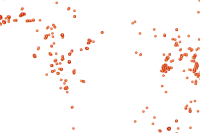

In [27]:
import pandas as pd
a_bats = gis.content.get("6e6f35e6abc3483298fb84c1e843939b")
a_bats

In [28]:
sedf = pd.DataFrame.spatial.from_layer(a_bats.layers[0])
sedf

,FID,idhidden,place_coun,place_stat,species_gu,scientific,common_nam,name,taxon_idlo,taxon_supe,...,urllink,img,photo_copy,info,num_identi,num_iden_1,latitudenu,longituden,geoprivacy,SHAPE
0,1,9330.0,South Africa,,Genus Epomophorus,Epomophorus,Epauletted Fruit Bats,Epauletted Fruit Bats,40807.0,,...,http://www.inaturalist.org/observations/9330,m20190,Photo no rights reserved,These bats hang out above the tourist's cafete...,0.0,3.0,0.0,0.0,-24.99249458,"{""x"": 3516866.8226507194, ""y"": -2874822.780768..."
1,2,485339.0,South Africa,,Epauletted fruit bats,Epomophorus,Epauletted Fruit Bats,Epauletted Fruit Bats,40807.0,,...,http://www.inaturalist.org/observations/485339,m613632,"Photo (c) Nick Dean, all rights reserved, uplo...","Satara rest camp, Kruger National Park, South ...",0.0,1.0,0.0,0.0,-24.39316,"{""x"": 3537659.167309875, ""y"": -2801390.0766535..."
2,3,905883.0,Ghana,,Noack's roundleaf bat,Hipposideros ruber,Noack's roundleaf bat,Noack's roundleaf bat,40747.0,Rhinolophoidea,...,http://www.inaturalist.org/observations/905883,m1154539,"Photo (c) paultehoda, some rights reserved (CC...",Noackâ€™s Roundleaf Bat\r\n,0.0,2.0,0.0,0.0,6.682066,"{""x"": -315532.0910272825, ""y"": 745536.13268415..."
3,4,12442.0,Senegal,,Gambian epauletted fruit bat,Epomophorus gambianus,Gambian Epauletted Fruit Bat,Gambian Epauletted Fruit Bat,40812.0,,...,http://www.inaturalist.org/observations/12442,m24617,"Photo no rights reserved, uploaded by Scott Lo...",roosting on the ceiling of the lodge and also ...,0.0,1.0,0.0,0.0,13.7821423,"{""x"": -1833354.0563258133, ""y"": 1549234.084052..."
4,5,485462.0,Ethiopia,Oromia,Free-tailed bats,Molossidae,Free-tailed Bats,Free-tailed Bats,41226.0,Vespertilionoidea,...,http://www.inaturalist.org/observations/485462,m613749,"Photo (c) kerejoo, all rights reserved, upload...",Dead bat on thorn of acacia tree,0.0,2.0,0.0,0.0,8.919212,"{""x"": 4443301.445006841, ""y"": 996916.694939253..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,2093,5053748.0,Uganda,,Straw-colored Fruit Bat,Eidolon helvum,Straw-colored Fruit Bat,Straw-colored Fruit Bat,40827.0,,...,https://www.inaturalist.org/observations/5053748,m6200445,"Photo (c) Alison Peel, some rights reserved (C...",Excerpt from Peel et al (2017)\r\n\r\nLocation...,0.0,1.0,0.0,0.0,0.502687597,"{""x"": 3711378.028336442, ""y"": 55959.6452486313..."
2093,2094,5053749.0,Sao Tome and Principe,Sao Tome,Straw-colored Fruit Bat,Eidolon helvum,Straw-colored Fruit Bat,Straw-colored Fruit Bat,40827.0,,...,https://www.inaturalist.org/observations/5053749,m6200428,"Photo (c) Alison Peel, some rights reserved (C...",Photo caption: E. helvum bats hunted by slings...,0.0,1.0,0.0,0.0,0.221716764,"{""x"": 750856.0867481094, ""y"": 24681.4588675637..."
2094,2095,5053750.0,Sao Tome and Principe,Principe,Straw-colored Fruit Bat,Eidolon helvum,Straw-colored Fruit Bat,Straw-colored Fruit Bat,40827.0,,...,https://www.inaturalist.org/observations/5053750,m6200597,"Photo (c) Alison Peel, some rights reserved (C...",Excerpt from Peel et al (2017)\r\n\r\nMultiple...,0.0,1.0,0.0,0.0,1.401288312,"{""x"": 811365.4851307466, ""y"": 156006.254631917..."
2095,2096,5053752.0,Equatorial Guinea,,Straw-colored Fruit Bat,Eidolon helvum,Straw-colored Fruit Bat,Straw-colored Fruit Bat,40827.0,,...,https://www.inaturalist.org/observations/5053752,m6200607,"Photo (c) Alison Peel, some rights reserved (C...",Excerpt from Peel et al (2017)\r\n\r\nMalabo (...,0.0,1.0,0.0,0.0,3.605009406,"{""x"": 975434.2241419714, ""y"": 401572.859062319..."


First, we'll just get a simple representation of all our features on the map.

In [29]:
map2 = Map("Africa")
map2.zoom = 3
map2

Map(center=[802282.9511337883, 2348145.5089206207], extent={'xmin': -2211278.194990278, 'ymin': -3997946.90685…

In [30]:
# map2.content.remove_all()
sedf.spatial.plot(
    map_widget = map2,
)

True

In [31]:
rend = map2.content.renderer(0)

In [32]:
rend.renderer.dict()

{'symbol': {'contentType': 'image/png',
  'height': 15,
  'imageData': 'iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAACXBIWXMAAA7DAAAOwwHHb6hkAAAAGXRFWHRTb2Z0d2FyZQBQYWludC5ORVQgdjMuNS4xTuc4+QAAB3VJREFUeF7tmPlTlEcexnve94U5mANQbgQSbgiHXHINlxpRIBpRI6wHorLERUmIisKCQWM8cqigESVQS1Kx1piNi4mW2YpbcZONrilE140RCTcy3DDAcL/zbJP8CYPDL+9Ufau7uqb7eZ7P+/a8PS8hwkcgIBAQCAgEBAICAYGAQEAgIBAQCAgEBAICAYGAQEAgIBAQCDx/AoowKXFMUhD3lQrioZaQRVRS+fxl51eBTZUTdZ41U1Rox13/0JF9csGJ05Qv4jSz/YPWohtvLmSKN5iTGGqTm1+rc6weICOBRbZs1UVnrv87T1PUeovxyNsUP9P6n5cpHtCxu24cbrmwKLdj+osWiqrVKhI0xzbmZ7m1SpJ+1pFpvE2DPvGTomOxAoNLLKGLscZYvB10cbYYjrJCb7A5mrxleOBqim+cWJRakZY0JfnD/LieI9V1MrKtwokbrAtU4Vm0A3TJnphJD4B+RxD0u0LA7w7FTE4oprOCMbklEGNrfdGf4IqnQTb4wc0MFTYibZqM7JgjO8ZdJkpMln/sKu16pHZGb7IfptIWg389DPp9kcChWODoMuDdBOhL1JgpisbUvghM7AqFbtNiaFP80RLnhbuBdqi0N+1dbUpWGde9gWpuhFi95yL7sS7BA93JAb+Fn8mh4QujgPeTgb9kAZf3Apd2A+fXQ38yHjOHozB1IAJjOSEY2RSIwVUv4dd4X9wJccGH

In [33]:
sm = rend.smart_mapping()

In [34]:
sm.unique_values_renderer(field = "taxon_supe")

In [35]:
sm.class_breaks_renderer("color", field = "taxon_idlo")

In [47]:
rend = map2.content.renderer(0).renderer.dict()
rend

{'authoringInfo': {'classificationMethod': 'esriClassifyEqualInterval',
  'fadeRatio': 0.0,
  'type': 'classedColor'},
 'classBreakInfos': [{'classMaxValue': 99268.8,
   'label': '0 – 99,268',
   'symbol': {'angle': 0.0,
    'color': [241, 238, 246, 255],
    'outline': {'color': [153, 153, 153, 64],
     'style': 'esriSLSSolid',
     'type': 'esriSLS',
     'width': 0.375},
    'size': 6,
    'style': 'esriSMSCircle',
    'type': 'esriSMS',
    'xoffset': 0,
    'yoffset': 0}},
  {'classMaxValue': 198537.6,
   'label': '> 99,268 – 198,537',
   'symbol': {'angle': 0.0,
    'color': [215, 181, 216, 255],
    'outline': {'color': [153, 153, 153, 64],
     'style': 'esriSLSSolid',
     'type': 'esriSLS',
     'width': 0.375},
    'size': 6,
    'style': 'esriSMSCircle',
    'type': 'esriSMS',
    'xoffset': 0,
    'yoffset': 0}},
  {'classMaxValue': 297806.4,
   'label': '> 198,537 – 297,806',
   'symbol': {'angle': 0.0,
    'color': [223, 101, 176, 255],
    'outline': {'color': [153, 15

In [34]:
len(rend["classBreakInfos"])

5

In [48]:
new_scheme = ['rgb(208,28,139)','rgb(241,182,218)','rgb(247,247,247)','rgb(184,225,134)','rgb(77,172,38)']
for i in range(0, len(new_scheme)):
    rgb_string = new_scheme[i]
    numbers_string = rgb_string[rgb_string.index('(') + 1:rgb_string.index(')')]
    numbers_list = numbers_string.split(',')
    color = [int(num) for num in numbers_list]
    color.append(255)
    rend["classBreakInfos"][i]['symbol']['color'] = color
rend

{'authoringInfo': {'classificationMethod': 'esriClassifyEqualInterval',
  'fadeRatio': 0.0,
  'type': 'classedColor'},
 'classBreakInfos': [{'classMaxValue': 99268.8,
   'label': '0 – 99,268',
   'symbol': {'angle': 0.0,
    'color': [208, 28, 139, 255],
    'outline': {'color': [153, 153, 153, 64],
     'style': 'esriSLSSolid',
     'type': 'esriSLS',
     'width': 0.375},
    'size': 6,
    'style': 'esriSMSCircle',
    'type': 'esriSMS',
    'xoffset': 0,
    'yoffset': 0}},
  {'classMaxValue': 198537.6,
   'label': '> 99,268 – 198,537',
   'symbol': {'angle': 0.0,
    'color': [241, 182, 218, 255],
    'outline': {'color': [153, 153, 153, 64],
     'style': 'esriSLSSolid',
     'type': 'esriSLS',
     'width': 0.375},
    'size': 6,
    'style': 'esriSMSCircle',
    'type': 'esriSMS',
    'xoffset': 0,
    'yoffset': 0}},
  {'classMaxValue': 297806.4,
   'label': '> 198,537 – 297,806',
   'symbol': {'angle': 0.0,
    'color': [247, 247, 247, 255],
    'outline': {'color': [153, 153

In [44]:
from arcgis.map.renderers import ClassBreaksRenderer
map2.content.renderer(0).renderer = ClassBreaksRenderer(**rend)

In [49]:
map2

Map(center=[21.093750000000053, 8.709686331985443], extent={'spatialReference': {'latestWkid': 3857, 'wkid': 1…

### Authoring Popups

Let's take a look at another cool thing we can do with these new powerful mapping classes: we'll make a popup for all of our data points, because we really want our users to know what bats look like when they click around on our map.

In [50]:
from arcgis.map.popups import FieldInfo, MediaInfo, MediaType
# get popup manager
popup_manager = map2.content.popup(0)
popup_manager.info # This is None at first

In [51]:
# create field infos
fields = [FieldInfo(field_name=fld) for fld in sedf.columns]
fields

[FieldInfo(field_name='FID', format=None, is_editable=True, label=None, statistic_type=None, string_field_option=None, tooltip=None, visible=None),
 FieldInfo(field_name='idhidden', format=None, is_editable=True, label=None, statistic_type=None, string_field_option=None, tooltip=None, visible=None),
 FieldInfo(field_name='place_coun', format=None, is_editable=True, label=None, statistic_type=None, string_field_option=None, tooltip=None, visible=None),
 FieldInfo(field_name='place_stat', format=None, is_editable=True, label=None, statistic_type=None, string_field_option=None, tooltip=None, visible=None),
 FieldInfo(field_name='species_gu', format=None, is_editable=True, label=None, statistic_type=None, string_field_option=None, tooltip=None, visible=None),
 FieldInfo(field_name='scientific', format=None, is_editable=True, label=None, statistic_type=None, string_field_option=None, tooltip=None, visible=None),
 FieldInfo(field_name='common_nam', format=None, is_editable=True, label=None, 

In [52]:
# create media infos
media = [MediaInfo(type=MediaType.image, value ={
    "source_url": "https://www.awf.org/sites/default/files/styles/vertical_image/public/2020-04/SpeciesPage_Bat03_01_Solutions.jpg?h=3c6d87fa&itok=w6ooNaCZ",
    "link_url": "https://www.awf.org/wildlife-conservation/bat"
})]

# apply to popup
popup_manager.edit("Bat Data", field_infos=fields, media_infos=media)

True

In [53]:
map2

Map(center=[21.093750000000053, 8.709686331985443], extent={'spatialReference': {'latestWkid': 3857, 'wkid': 1…